In [37]:
import numpy as np
from numpy import invert
from numpy import transpose as T
from numpy.linalg import inv
import matplotlib.pyplot as plt 

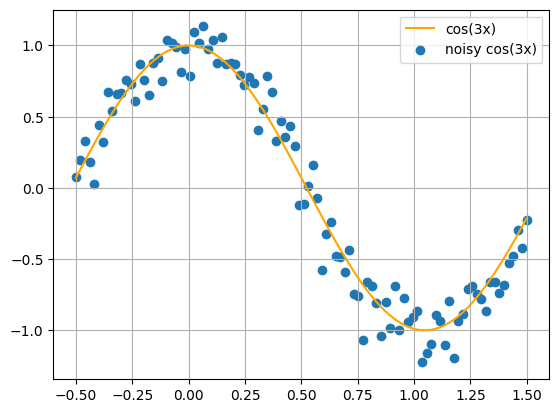

In [58]:
#### Problem 1 ####
x = np.linspace(-.5, 1.5, 100)
y = np.cos(3 * x)
noise = np.random.normal(0, 0.12, 100)

y_n = y + noise 

plt.plot(x, y, label = 'cos(3x)', color = 'orange')
plt.scatter(x, y_n, label = 'noisy cos(3x)')
plt.legend()
plt.grid()

plt.show()

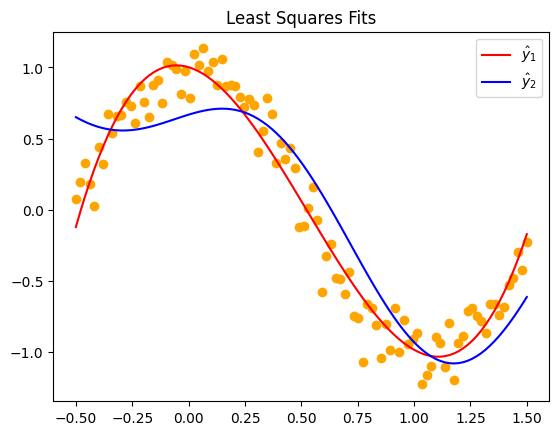

In [59]:
vars1= np.empty((100, 4))
vars2 = np.empty((100, 4))

for i in range (0, 100):
    ix = x[i]
    vars1[i, 0] = 1 
    vars1[i, 1] = ix 
    vars1[i, 2] = 2 * ix**2 - 1
    vars1[i, 3] = 4 * ix**3 - 3 * ix 

    vars2[i,0] = np.cos(ix)**2 
    vars2[i,1] = 1 - 2*np.sin(ix)
    vars2[i,2] = np.cos(3*ix)*np.sin(ix) 
    vars2[i,3] = (3 - ix)/(3 + ix)


cHat1 = inv(T(vars1)@vars1)@T(vars1)@y_n
cHat2 = inv(T(vars2)@vars2)@T(vars2)@y_n


yHat1 = cHat1[0] + cHat1[1]*x + cHat1[2]*(2*x**2 - 1) + cHat1[3] * (4*x**3 - 3*x)
yHat2 = cHat2[0]*np.cos(x)**2 + cHat2[1]*(1 - 2*np.sin(x)) + cHat2[2]*(np.cos(3*x)*np.sin(x)) + cHat2[3]*((3 - x)/(3 + x))

plt.scatter(x, y_n, color = 'orange')
plt.plot(x, yHat1, label = '$\hat{y}_1$', color = 'red')
plt.plot(x, yHat2, label = '$\hat{y}_2$', color = 'blue')
plt.legend()

plt.title('Least Squares Fits')
plt.show()

"""
FInSIH THE L1 L2 Linfty Things 
"""

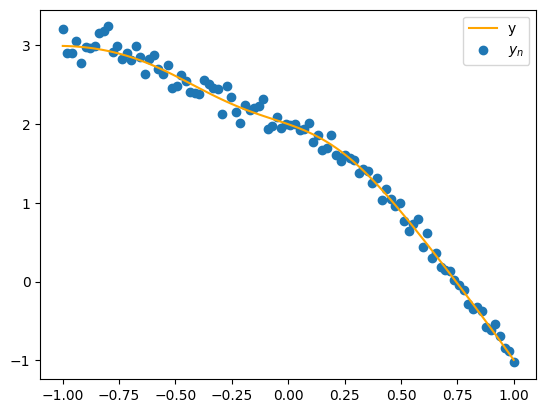

In [135]:
#### Problem 3 #####
x = np.linspace(-1, 1, 100)
y = 12 - x**2 - np.exp(-5*x**2)*np.sin(-x)-2*(5+x)
noise = np.random.normal(0, .1, 100)

y_n = y + noise

plt.plot(x, y, color = 'orange', label = 'y')
plt.scatter(x, y_n, label = '$y_n$')

plt.legend()

plt.show()

In [188]:
def f(x, ck):
    a, b, c, d = ck
    return (12 - b*x**2 - np.exp(-d*x**2)*np.sin(c*x)+a*(b*d-c*x))

def Jac(x, ck):
    a, b, c, d = ck
    return (np.array([b*d - c*x, -x**2 + a*d, -x * np.exp(-d*x**2)*np.cos(c * x) - a*x, 
                      x**2 * np.exp(-d * x**2)*np.sin(c*x) + a*b])).T



# # initial guess
ck = np.array([-2.2, .3, -1,5.2])
res = f(x, ck) - f(x, [2, 1, -1, 5])
print(np.linalg.pinv(Jac(x,ck)) @ y)




# for i in range(50):
#     a, b, c, d = ck 

#     pa = b*d - c*x
#     pb = -x**2 + a*d
#     pc = -x * np.exp(-d*x**2)*np.cos(c * x) - a*x
#     pd = x**2 * np.exp(-d * x**2)*np.sin(c*x) + a*b

#     J = np.array([pa, pb, pc, pd]).T
#     res = 12 - b * x**2 - np.exp(-d * x**2) * np.sin(c * x) + a*(b * d - c * x) - y

#     cknext = ck - inv(T(J) @ J) @ T(J) @ res
#     ck = cknext
#     # print(ck)


# print(ck)
# a, b, c, d = ck 

# ynonlinear = 12 - b * x**2 - np.exp(-d * x**2)*np.sin(c * x)+a*(b*d - c*x)
# plt.plot(x, y, color = 'blue', linewidth = 1)
# plt.plot(x, ynonlinear, label = 'Nonlinear Least Squares f(x)', color = 'orange', linewidth = 1)
# # plt.scatter(x, y_n, label = '$y_{noisy}$')

# plt.legend()
# plt.show()


[ -0.01709724   0.57684712  -1.05962402 -12.85929248]
